## Manipulate images one pixel at a time
---

* Cropping
* Changing Image pixels

#### First, we import the required libraries and read the image

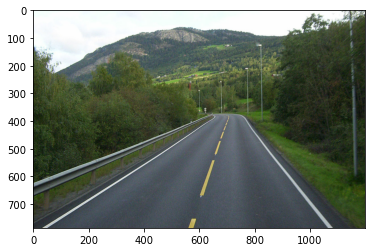

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

path = "./data/Road_in_Norway_Wikipedia.jpg"
image_p = plt.imread(path)
plt.imshow(image_p)
plt.show()

### Cropping the image using indexing

In [2]:
image_p.shape

(786, 1200, 3)

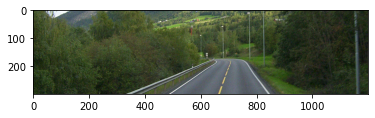

numpy.ndarray

In [3]:
_upper = 200
_lower = 500

img_crp_v = image_p[200:500, :, :]
plt.imshow(img_crp_v)
plt.show()
type(img_crp_v)

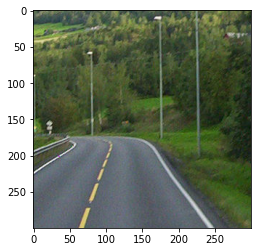

In [4]:
_left = 600
_right = 900

img_crp_h = image_p[_upper:_lower, _left:_right, :]
plt.imshow(img_crp_h)
plt.show()

### Applying <font color = "blue">crop()</font> using PIL Image object

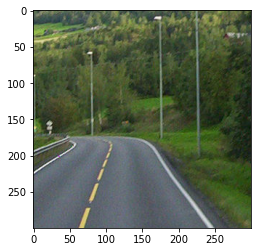

In [5]:
###############################
## Importing the PIL library ##
###############################

from PIL import Image

image_p = Image.open(path)
img_crop_p = image_p.crop((_left, _upper, _right, _lower))
plt.imshow(img_crop_p)
plt.show()

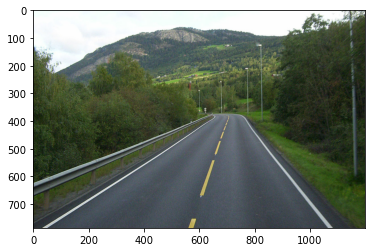

In [6]:
img_dup = image_p.copy()
plt.imshow(img_dup)
plt.show()

#### Let's change the pixel values of the cropped portion within the whole image

In [7]:
img_dup[_upper:_lower,:,:] = 0

TypeError: 'Image' object does not support item assignment

Inorder to do so, we must convert the following <b>image into numpy array.</b> Let's see how it's done.

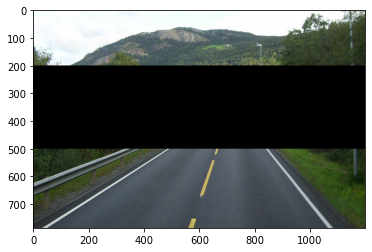

In [8]:
img_dup = np.array(img_dup)
img_dup[_upper:_lower,:,:] = 0

plt.imshow(img_dup)
plt.show()

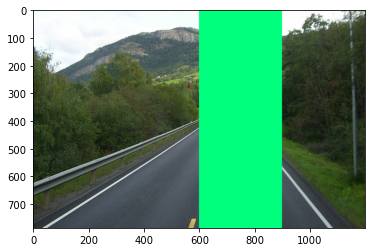

In [9]:
img_dup2 = image_p.copy()
img_dup2 = np.array(img_dup2)

########################################################
## image[rows, columns, channel_number]               ##
## Normally, a RGB image will have three channels,    ##
## one for each channel                               ##
## whereas the grayscale image will have two channels ##
########################################################

img_dup2[:, _left:_right, 0] = 0
img_dup2[:, _left:_right, 1] = 255 # Manipulating the green channel, assigning peak value here.
img_dup2[:, _left:_right, 2] = 125 # Manipulating the blue channel.

plt.imshow(img_dup2)
plt.show()

### Let's superimpose an image on another

We'll consider **img_dup** and **img_dup2** and let's see what we get. Superimposing img_dup2 on img_dup. 
* Re-assigning the image pixel values with the values we have for img_dup2

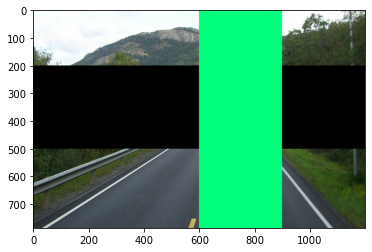

In [10]:
img_dup[:, _left:_right, :] = img_dup2[:, _left:_right,:]
plt.imshow(img_dup)
plt.show()

### Here we go!

Superimposing an image on another using **paste()**

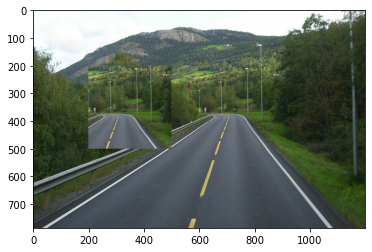

In [11]:
img_pil_read = Image.open(path)
coor_point = (200, 200)
img_pil_read.paste(img_crop_p, box=coor_point) # We have to select image of dtype Image not np.ndarray
plt.imshow(img_pil_read)
plt.show()